# Music Genre Classification
In this notebook I tried to learn the basic concepts of neural networks and use it to classify the music files in dataset. Majorly this notebook can be divided into 3 parts:

   1) Using ANN 

   2) Tackling overfitting with ANN

   3) Using CNN


Also to read the dataset I have used librosa library which only read files <1Mb and one file is greater than the size giving error due to which I have ignored it. The dataset contains the following genres, the keys being the prediction targets
    
    0: "disco",
    1: "metal",
    2: "reggae",
    3: "blues",
    4: "rock",
    5: "classical",
    6: "jazz",
    7: "hiphop",
    8: "country",
    9: "pop"


In [1]:
import os
import librosa
import math
import json 
import matplotlib.pyplot as plt
import numpy as np
from codeFeature.feature_extractor_cnn import *

In [2]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr=1e-4)
from IPython.display import clear_output
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [3]:
dataset_path = r"./genres_original"
json_path = r"./class_xls/data.json"
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [4]:
# def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
#              hop_length=512, num_segments=5):
#     # Data storage dictionary
#     data = {
#         "mapping": [],
#         "mfcc": [],
#         "labels": [],
#     }
#     samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
#     expected_vects_ps = math.ceil(samples_ps/hop_length)
    
#     # loop through all the genres
#     for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensuring not at root
#         if dirpath is not dataset_path:
#             # save the semantic label
#             dirpath_comp = dirpath.split("/")
#             semantic_label = dirpath_comp[-1]
#             data["mapping"].append(semantic_label)
#             print(f"Processing: {semantic_label}")
            
#             # process files for specific genre
#             for f in filenames:
#                 if(f==str("jazz.00054.wav")):
#                     # As librosa only read files <1Mb
#                     continue
#                 else:
#                     # load audio file
#                     file_path = os.path.join(dirpath, f)
#                     signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
#                     for s in range(num_segments):
#                         start_sample = samples_ps * s
#                         finish_sample = start_sample + samples_ps

#                         mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
#                                                     sr = sr,
#                                                     n_fft = n_fft,
#                                                     n_mfcc = n_mfcc,
#                                                     hop_length = hop_length)

#                         mfcc = mfcc.T

#                         # store mfcc if it has expected length 
#                         if len(mfcc)==expected_vects_ps:
#                             data["mfcc"].append(mfcc.tolist())
#                             data["labels"].append(i-1)
#                             print(f"{file_path}, segment: {s+1}")

#     with open(json_path,"w") as f:
#         json.dump(data,f,indent=4)

In [5]:
save_mfcc(dataset_path,json_path,num_segments=10)
clear_output()

In [6]:
filepath = r"./genres_original/blues/blues.0000"

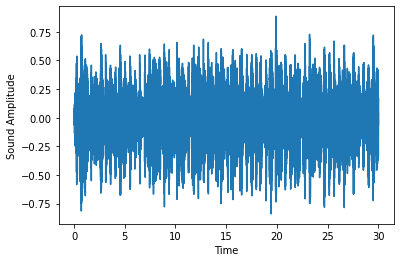

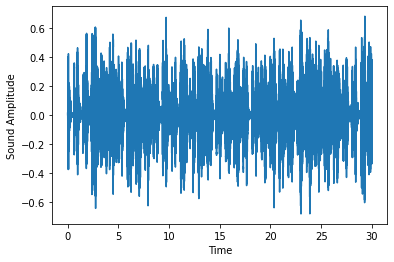

In [7]:
for i in range(2):
    audio, sfreq = librosa.load(filepath+str(i)+".wav")
    time = np.arange(0, len(audio))/sfreq
    plt.plot(time,audio)
    plt.xlabel("Time")
    plt.ylabel("Sound Amplitude")
    plt.show()

# Classifier
This part uses the concepts of ANN with keras and sequential layers. I have also done splitting in the ratio 70:30

The model is Sequential and architecture only has Flatten and the Dense layers available in keras for the basic ANN representation. As it is naive model we can expect it to be overfit. Info on the layers can be found [here](https://machinelearningknowledge.ai/different-types-of-keras-layers-explained-for-beginners/)

In [8]:
# load data
# def load_data(dataset_path):
#     with open(dataset_path,"r") as f:
#         data = json.load(f)
    
#     # Convert list to numpy arrays
#     inputs = np.array(data["mfcc"])
#     targets = np.array(data["labels"])    
    
#     return inputs,targets

In [9]:
inputs,targets = load_data(r"./class_xls/data.json")

In [10]:
# splitting the data

input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)

(6990, 130, 13) (6990,)


# CNN
Using keras layers of Conv2D, MaxPool2D, BatchNormalization.

CNN layers takes input primarily in 3D shape, so we again have to prepare the dataset in the form and for that, I have used np.newaxis function which adds a column/layer in the data

In [11]:
# def prepare_dataset(test_size, validation_size):
#     X,y = load_data(r"./class_xls/data.json")
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
#     X_train = X_train[..., np.newaxis]
#     X_val = X_val[..., np.newaxis]
#     X_test = X_test[..., np.newaxis]

#     return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2, json_path)

In [13]:
X_train.shape

(5991, 130, 13, 1)

In [14]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

(130, 13, 1)


In [15]:
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
# model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3, 3), activation = "relu"))
# model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (2, 2), activation = "relu"))
# model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())

# model.add(Conv2D(16, (1, 1), activation = "relu"))
# model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())

# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(10, activation="softmax"))

# model.summary()

In [16]:
model = get_CNN_model(input_shape)

In [17]:
# model.compile(optimizer=adam,
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 epochs = 40,
                 batch_size = 32)

Epoch 1/40
188/188 [==============================] - 3s 9ms/step - loss: 2.4691 - accuracy: 0.1963 - val_loss: 2.0351 - val_accuracy: 0.2830
Epoch 2/40
188/188 [==============================] - 1s 7ms/step - loss: 2.0136 - accuracy: 0.3123 - val_loss: 1.7514 - val_accuracy: 0.3885
Epoch 3/40
188/188 [==============================] - 1s 7ms/step - loss: 1.7987 - accuracy: 0.3751 - val_loss: 1.5881 - val_accuracy: 0.4332
Epoch 4/40
188/188 [==============================] - 1s 7ms/step - loss: 1.6565 - accuracy: 0.4181 - val_loss: 1.4839 - val_accuracy: 0.4660
Epoch 5/40
188/188 [==============================] - 1s 7ms/step - loss: 1.5505 - accuracy: 0.4505 - val_loss: 1.3834 - val_accuracy: 0.5067
Epoch 6/40
188/188 [==============================] - 1s 7ms/step - loss: 1.4832 - accuracy: 0.4774 - val_loss: 1.3627 - val_accuracy: 0.4973
Epoch 7/40
188/188 [==============================] - 1s 7ms/step - loss: 1.4183 - accuracy: 0.4989 - val_loss: 1.2910 - val_accuracy: 0.5254
Epoch 

In [18]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 1440x1080 with 0 Axes>

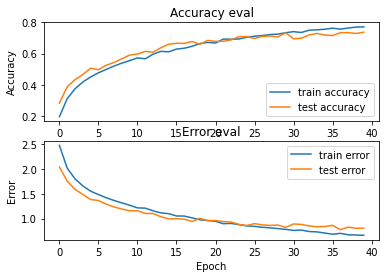

In [19]:
plot_history(hist)

In [20]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

79/79 [==============================] - 0s 4ms/step - loss: 0.7851 - accuracy: 0.7333
Test accuracy: 0.7332799434661865


In [21]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")

In [22]:
predict(model, X_test[10], y_test[10])

Expected index: 5, Predicted index: [5]


In [23]:
X_test[10].shape

(130, 13, 1)

In [24]:
y_test[10]

5

In [25]:
# Creates a HDF5 file 'lstm_genre_classifier.h5'
model_filename = "./class_xls/model_cnn_weights.h5"
print("\nSaving model: " + model_filename)
model.save(model_filename)
# Creates a json file
# print("creating .json file....")
model_json = model.to_json()
f = "./class_xls/model_cnn.json"
#save the model architecture to JSON file
with open(f, 'w') as json_file:
    json_file.write(model_json)



Saving model: ./class_xls/model_cnn_weights.h5


In [26]:
# def FileCheck(fn):
#     try:
#         librosa.load(fn, mono=True, duration=30)
#         return 1
#     except:
#         print (f"Error: File {fn} does not appear to exist.")
#         return 0

In [27]:
# def get_feature_mfcc(filenames, n_mfcc=13, n_fft=2048,
#              hop_length=512, num_segments=5):
#     # Data storage dictionary
#     data = {
#         "mapping": [],
#         "mfcc": [],
#         "labels": [],
#     }
#     samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
#     expected_vects_ps = math.ceil(samples_ps/hop_length)
    
#     # process files for specific genre
#     if FileCheck(filenames)!=1:
#         # As librosa only read files <1Mb
#         return data
#     else:
#         # load audio file
#         signal,sr = librosa.load(filenames,sr=SAMPLE_RATE, duration=30)
#         for s in range(num_segments):
#             start_sample = samples_ps * s
#             finish_sample = start_sample + samples_ps

#             mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
#                                         sr = sr,
#                                         n_fft = n_fft,
#                                         n_mfcc = n_mfcc,
#                                         hop_length = hop_length)

#             mfcc = mfcc.T

#             # store mfcc if it has expected length 
#             if len(mfcc)==expected_vects_ps:
#                 data["mfcc"].append(mfcc.tolist())
#                 data["labels"].append(i-1)
#                 print(f"{filenames}, segment: {s+1}")
#     return data

In [28]:
# def GetGenre(genre_music_path):
#     label_names = [item for item in os.listdir(genre_music_path) if os.path.isdir(os.path.join(genre_music_path, item))]
#     nb_train_samples = sum([len(files) for _, _, files in os.walk(genre_music_path)])
#     return label_names, nb_train_samples

genres, nb_train_samples = GetGenre(dataset_path)


In [29]:
# extractaudio_features = get_feature_mfcc("./genres_original/rock/rock.00025.wav", num_segments=10)
# extractaudio_features = np.array(extractaudio_features["mfcc"])
# extractaudio_features = extractaudio_features[..., np.newaxis]
# prediction = model.predict(extractaudio_features)
# data_predict = []
# for i in range(prediction.shape[0]):
#     data_predict.append(prediction[1])
# predict_genre = np.argmax(data_predict)
# genres[predict_genre]


In [34]:
genres[predict_cnn("./genres_original/rock/rock.00025.wav", model, num_segments=10)]

./genres_original/rock/rock.00025.wav, segment: 1
./genres_original/rock/rock.00025.wav, segment: 2
./genres_original/rock/rock.00025.wav, segment: 3
./genres_original/rock/rock.00025.wav, segment: 4
./genres_original/rock/rock.00025.wav, segment: 5
./genres_original/rock/rock.00025.wav, segment: 6
./genres_original/rock/rock.00025.wav, segment: 7
./genres_original/rock/rock.00025.wav, segment: 8
./genres_original/rock/rock.00025.wav, segment: 9
./genres_original/rock/rock.00025.wav, segment: 10


'rock'

In [33]:

genres[predict_cnn("blues.00043.wav", model, num_segments=10)]

blues.00043.wav, segment: 1
blues.00043.wav, segment: 2
blues.00043.wav, segment: 3
blues.00043.wav, segment: 4
blues.00043.wav, segment: 5
blues.00043.wav, segment: 6
blues.00043.wav, segment: 7
blues.00043.wav, segment: 8
blues.00043.wav, segment: 9
blues.00043.wav, segment: 10


'blues'

In [38]:
genres[predict_cnn("E:\download\RockStrayKids.mp3", model, num_segments=10)]

E:\download\RockStrayKids.mp3, segment: 1
E:\download\RockStrayKids.mp3, segment: 2
E:\download\RockStrayKids.mp3, segment: 3
E:\download\RockStrayKids.mp3, segment: 4
E:\download\RockStrayKids.mp3, segment: 5
E:\download\RockStrayKids.mp3, segment: 6
E:\download\RockStrayKids.mp3, segment: 7
E:\download\RockStrayKids.mp3, segment: 8
E:\download\RockStrayKids.mp3, segment: 9
E:\download\RockStrayKids.mp3, segment: 10


'blues'